# Supervised Learning Coursework 1 Coding Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Initialise condition for question a

In [2]:
data_x = np.array([1, 2, 3, 4])
data_y = np.array([3, 2, 0, 5])

##### Question 1a

Degree 1 polynomial coefficients: [1.5 0.4]
Degree 2 polynomial coefficients: [ 9.  -7.1  1.5]
Degree 3 polynomial coefficients: [-5.         15.16666667 -8.5         1.33333333]
Degree 4 polynomial coefficients: [-4.81762695  5.49829102 -0.58740234 -0.8850708   0.21585464]


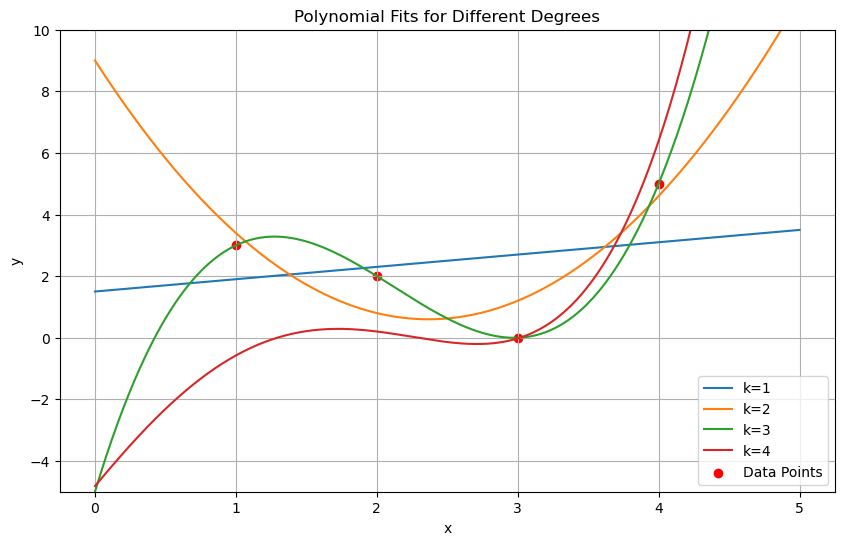

In [ ]:
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 5, 500)

def extract_features(X, degree):
    return np.concatenate((np.ones_like(X),X, np.power(X,degree)),
axis =1)

for degree in range(1, 5):
    X = extract_features(data_x, degree)
    coeffs = np.linalg.inv(X.T @ X) @ X.T @ data_y

    X_plot = extract_features(x_plot, degree)
    y_plot = X_plot @ coeffs
    plt.plot(x_plot, y_plot, label=f'k={degree}')

    print(f"Degree {degree} polynomial coefficients: {coeffs}")

plt.scatter(data_x, data_y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 10)
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
plt.show()

##### Question 1b

In [4]:
for k in range(1, 5):
    coeffs = np.polyfit(data_x, data_y, k)
    y_pred = np.polyval(coeffs, data_x)
    mse = np.mean((data_y - y_pred) ** 2)
    print(f"MSE for k={k}: {mse}")

MSE for k=1: 3.05
MSE for k=2: 0.7999999999999998
MSE for k=3: 4.9901368712018154e-27
MSE for k=4: 2.185175522341313e-28


/var/folders/wy/3sxd9blx6bxgs72tmypqqrzr0000gn/T/ipykernel_41301/1234979172.py:2: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(data_x, data_y, k)


##### Question 1c

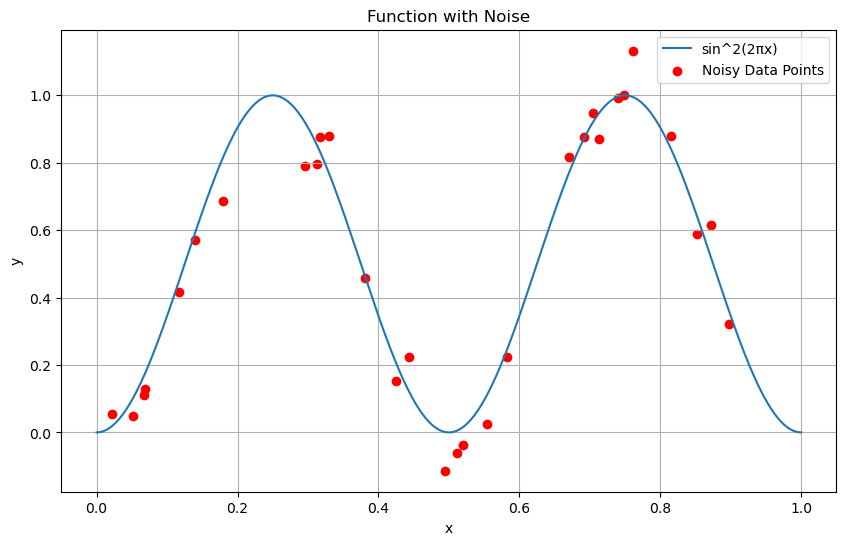

In [5]:
def g_sigma(x, sigma):
    noise = np.random.normal(0, sigma, size=len(x))
    return np.sin(2 * np.pi * x)**2 + noise

# 生成数据并绘图
x_sample = np.sort(np.random.rand(30))
y_sample = g_sigma(x_sample, sigma=0.07)

x_plot = np.linspace(0, 1, 500)
y_plot = np.sin(2 * np.pi * x_plot)**2

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='sin^2(2πx)')
plt.scatter(x_sample, y_sample, color='red', label='Noisy Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')
plt.legend()
plt.grid(True)
plt.show()